# Review Classification - Printer

In [1]:
#import the dataset
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',None)

df=pd.read_csv("Printer Rating.csv")
df.head()

,Unnamed: 0,Rating,Heading,Review,Product
0,0,5.0,Perfect product!,"Very nice printer, is worth the purchase. Idea...",Printer
1,1,5.0,Excellent,"great !! easy to use ,, budget friendly,, good...",Printer
2,2,5.0,Brilliant,nice product\nI am a student I ordered this fo...,Printer
3,3,NaN,NaN,NaN,Printer
4,4,NaN,NaN,NaN,Printer


#### Observations:
* The feature unnamed is index. Hence we can drop this feature.

In [2]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Rating,Heading,Review,Product
0,5.0,Perfect product!,"Very nice printer, is worth the purchase. Idea...",Printer
1,5.0,Excellent,"great !! easy to use ,, budget friendly,, good...",Printer
2,5.0,Brilliant,nice product\nI am a student I ordered this fo...,Printer
3,NaN,NaN,NaN,Printer
4,NaN,NaN,NaN,Printer


# Exploratory Data Analysis

In [3]:
#check the dimensions of the data (Headphone)
df.shape

(14939, 4)

#### Observations
* The dataset has 14939 rows and 4 columns
* The dataset has 1 label - 'Rating' and 3 features

In [4]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product'], dtype='object')

In [5]:
#check the datatype of each feature
df.dtypes

Rating     float64
Heading     object
Review      object
Product     object
dtype: object

#### Observations:
   * All the feratures are of "object" data type.

In [6]:
#checking if there are any null values in the dataset
df.isna().sum()

Rating     456
Heading    429
Review     427
Product      0
dtype: int64

In [7]:
#dropping all numm values
df.dropna(inplace=True)

In [8]:
#cross checking null values
df.isna().sum()

Rating     0
Heading    0
Review     0
Product    0
dtype: int64

In [9]:
df.shape

(14481, 4)

#### Observations:
* There are 14481 rows in the dataset

In [10]:
df['Rating'].value_counts()

5.0    6436
1.0    3391
4.0    2544
3.0    1333
2.0     777
Name: Rating, dtype: int64

#### Observations:
* The ratings are inbalanced. 
* Most of the ratings are 5 star.

In [11]:
#check number of unique values in each class;
df.nunique()

Rating        5
Heading     718
Review     5580
Product       1
dtype: int64

#### Observations:
* The label rating has 5 unique values: 1, 2, 3, 4, 5
* The headings can be duplicate as it is kind of summary of the review.
* The reviews should be unique. Hence, we will drop the duplicate reviews to avoid over-fitting.

In [12]:
df.drop_duplicates(subset='Review', inplace=True)

In [13]:
#cross checking for diplicacy of reviews
print(df.shape)
print(df.nunique())

(5580, 4)
Rating        5
Heading     697
Review     5580
Product       1
dtype: int64


#### Observations:
* We have 5580 unique reviews for laptops
* There are only 697 unique headings in the data set.
* If the classification is to be done based on the heading, then only unique headings must be considered.
* In the model building stage we will classfiy from unique headings as well.

In [14]:
#checking the length of review
df['Review_word_counter']=df['Review'].str.strip().str.len()
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,5.0,Perfect product!,"Very nice printer, is worth the purchase. Idea...",Printer,510
1,5.0,Excellent,"great !! easy to use ,, budget friendly,, good...",Printer,110
2,5.0,Brilliant,nice product\nI am a student I ordered this fo...,Printer,201
9,1.0,Not recommended at all,printer is very good but it's cartage is not g...,Printer,202
10,5.0,nice product,"its a good printer, but i found it little slow...",Printer,119


In [15]:
from sklearn.utils import shuffle
df=shuffle(df)
df.reset_index(inplace=True,drop=True)

In [16]:
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,2.0,Bad quality,Black ink cartridge is empty in 4 print ( less...,Printer,59
1,5.0,Fabulous!,After using it for one month I am writing this...,Printer,170
2,1.0,Useless product,It is local it is not working now,Printer,33
3,3.0,ONLY 3 YRS LIFE,AFTER USING IT AFTER 3 1/2 YRS .... ITS NOT WO...,Printer,144
4,5.0,very nice product,i bought it for my childern for their school w...,Printer,124


### Exploratory Data Analysis

In [17]:
#check the dimensions of the data
df.shape

(5580, 5)

#### Observtions:
* The dataset has 5580 rows and 4 columns

In [18]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product', 'Review_word_counter'], dtype='object')

In [19]:
#check the datatype of each feature
df.dtypes

Rating                 float64
Heading                 object
Review                  object
Product                 object
Review_word_counter      int64
dtype: object

#### Observations:
   * There are three columns with "object" data type they are "Heading", "Review" and "Product".
   * There is one column (label) with float data type.

In [20]:
#checking if there are any null values in the dataset
df.isnull().sum()

Rating                 0
Heading                0
Review                 0
Product                0
Review_word_counter    0
dtype: int64

#### Observations:
   * There are no null values in the entire dataset

In [21]:
df['Rating'].value_counts()

5.0    2301
1.0    1463
4.0     951
3.0     525
2.0     340
Name: Rating, dtype: int64

#### Observations:
* There are more number of 5 star rated reviews.
* There are very less number of 2 star rated reviews.
* The data set is not perfectly balanced.

In [22]:
#Separation of rating as different labels.
df['1 Star']=df.apply(lambda x: 1 if x['Rating']==1 else 0, axis=1)
df['2 Star']=df.apply(lambda x: 1 if x['Rating']==2 else 0, axis=1)
df['3 Star']=df.apply(lambda x: 1 if x['Rating']==3 else 0, axis=1)
df['4 Star']=df.apply(lambda x: 1 if x['Rating']==4 else 0, axis=1)
df['5 Star']=df.apply(lambda x: 1 if x['Rating']==5 else 0, axis=1)

In [23]:
df.head(20)

,Rating,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,2.0,Bad quality,Black ink cartridge is empty in 4 print ( less...,Printer,59,0,1,0,0,0
1,5.0,Fabulous!,After using it for one month I am writing this...,Printer,170,0,0,0,0,1
2,1.0,Useless product,It is local it is not working now,Printer,33,1,0,0,0,0
3,3.0,ONLY 3 YRS LIFE,AFTER USING IT AFTER 3 1/2 YRS .... ITS NOT WO...,Printer,144,0,0,1,0,0
4,5.0,very nice product,i bought it for my childern for their school w...,Printer,124,0,0,0,0,1
5,5.0,Classy product,awsome,Printer,6,0,0,0,0,1
6,4.0,Really Nice,Initial performance is good..\nInk price is mo...,Printer,49,0,0,0,1,0
7,4.0,its awsome and available at cheap cost,i have used this for home use and its excellen...,Printer,150,0,0,0,1,0
8,5.0,Worth every penny,Wowww\nVery good printer.,Printer,24,0,0,0,0,1
9,1.0,Don't waste your money,caryage is not fully refill ink,Printer,31,1,0,0,0,0


In [24]:
df.drop(['Rating'], axis=1, inplace= True)

In [25]:
#statistical analysis
df.describe()

,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
count,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000
mean,82.979211,0.262186,0.060932,0.094086,0.170430,0.412366
std,104.864386,0.439863,0.239227,0.291975,0.376044,0.492304
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,100.250000,1.000000,0.000000,0.000000,0.000000,1.000000
max,510.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations
 * For all the labels the minimum value is zero and maximum is 1. As there are only binary classes deviations cannot be studied

In [26]:
#checking the skewness
df.skew()

Review_word_counter    2.411023
1 Star                 1.081696
2 Star                 3.672043
3 Star                 2.781472
4 Star                 1.753455
5 Star                 0.356145
dtype: float64

#### observations
* The highest skewness is seen in 2 Star rating

# Visualizations

In [27]:
#import libraries required for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

average length of review: 83.0


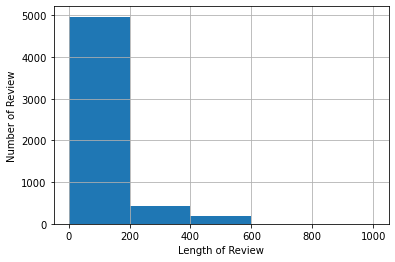

In [28]:
#plotting the average length of reviews
review=df["Review"]
x = [len(review[i]) for i in range(review.shape[0])]

print('average length of review: {:.1f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000]
plt.hist(x, bins=bins)
plt.xlabel('Length of Review')
plt.ylabel('Number of Review')       
plt.grid(True)
plt.show()

#### Observations:
* The average length of review is 83.
* Maximum number of reviews had less than 200 words.
* There were no reviews with more than 600 words.
* Comments with 200 and above words were less.

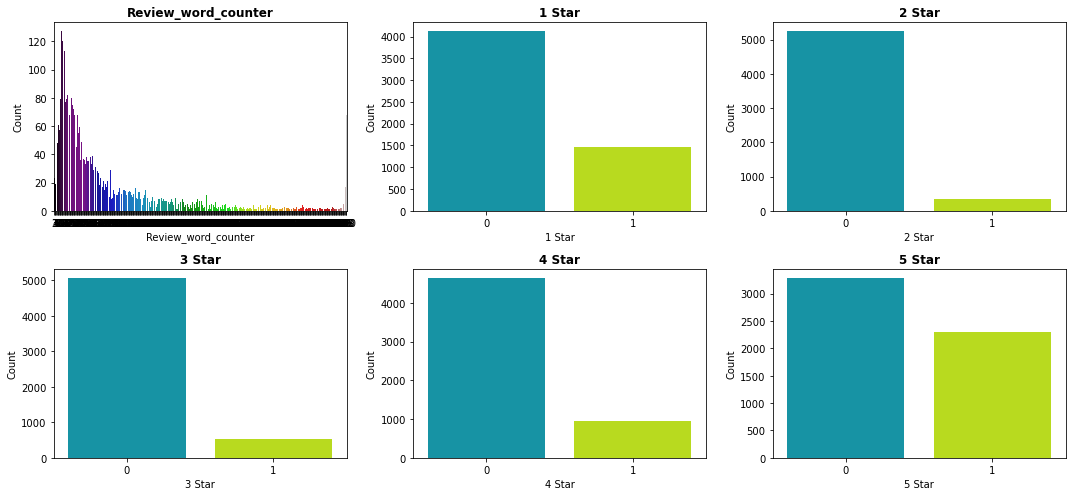

In [29]:
#let us plot countplot of each feature
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
for cols in df.columns:
    if df[cols].dtypes=='int64':
        plt.subplot(a, b, c)
        plt.title('{}'.format(cols),weight='bold')
        sns.countplot(df[cols],palette='nipy_spectral')
        plt.xticks(rotation=360)
        c = c + 1
        plt.tight_layout()
        plt.ylabel("Count")
plt.show()

#### Obseravtions:
   * Around 50% of the review are rated 5 star.
   * 2 star rated reviews are least in number

In [30]:
print(list(df.columns.values))

['Heading', 'Review', 'Product', 'Review_word_counter', '1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


In [31]:
#make a list of columns
categories = list(df.columns.values)
categories = categories[4:]
print(categories)

['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


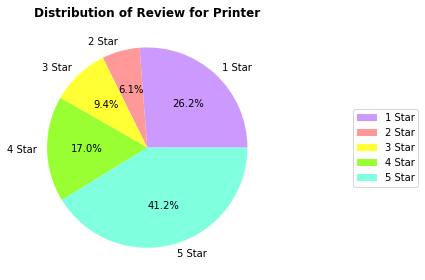

In [32]:
#distribution plot of each type of review
colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] 
df_distribution = df[categories].sum()

df_distribution.plot.pie(y='count',autopct='%1.1f%%',colors=colors)\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.ylabel("")
plt.title("Distribution of Review for Printer",fontweight='bold')
plt.tight_layout()
plt.show()

#### Observations:
* 5 Star rating had the highest share of 41.2%, followed by 4 star with 17%.
* 2 Star rating has least share with 6.1%

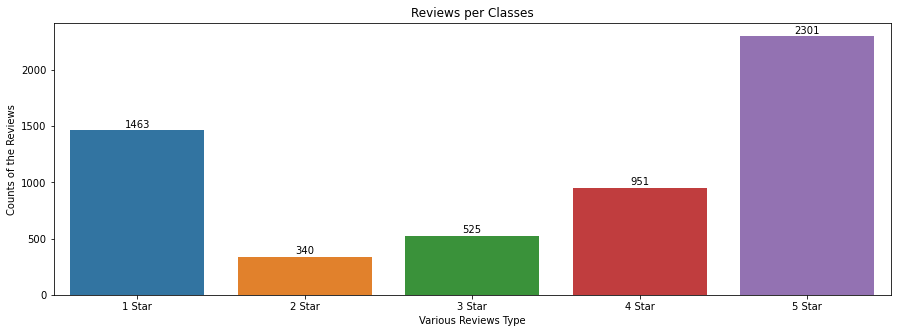

In [33]:
# Checking the count of the various types of reviews
cols = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
val_counts = df[cols].sum()

plt.figure(figsize=(15,5))
ax = sns.barplot(val_counts.index, val_counts.values)

plt.title("Reviews per Classes")
plt.xlabel("Various Reviews Type")
plt.ylabel("Counts of the Reviews")

rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")


plt.show()

#### Observations
* There were 2301 5 Star rated reviews which are maximum. 
* 4 Star reviews were second highest with count of 1463
* 2 Star ratings have the least count of only 340.

##  Data Pre-Processing

In [34]:
#convert all text into lowercase 
df['Review'] = df['Review'].str.lower()
df['Heading'] = df['Heading'].str.lower()
#check if the text is lower cased
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,super!,this is best quality products,Printer,29,0,0,0,0,1
1,pretty good,the product is good and easy to use. however n...,Printer,220,0,0,0,1,0
2,just okay,overall performance is satisfactory,Printer,35,0,0,1,0,0
3,good deal at such a low price,i bought it this week.and its so far good.took...,Printer,185,0,0,0,1,0
4,good choice,prints good but cartridges are very expensive,Printer,45,0,0,0,1,0


In [35]:
#clean all html tags 
import re
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
#apply the function 
df['Review'] = df['Review'].apply(cleanHtml)
df['Heading'] = df['Heading'].apply(cleanHtml)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,super!,this is best quality products,Printer,29,0,0,0,0,1
1,pretty good,the product is good and easy to use. however n...,Printer,220,0,0,0,1,0
2,just okay,overall performance is satisfactory,Printer,35,0,0,1,0,0
3,good deal at such a low price,i bought it this week.and its so far good.took...,Printer,185,0,0,0,1,0
4,good choice,prints good but cartridges are very expensive,Printer,45,0,0,0,1,0


In [36]:
#remove punctuations
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
#call the function
df['Review'] = df['Review'].apply(cleanPunc)
df['Heading'] = df['Heading'].apply(cleanPunc)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,super,this is best quality products,Printer,29,0,0,0,0,1
1,pretty good,the product is good and easy to use however n...,Printer,220,0,0,0,1,0
2,just okay,overall performance is satisfactory,Printer,35,0,0,1,0,0
3,good deal at such a low price,i bought it this week and its so far good took...,Printer,185,0,0,0,1,0
4,good choice,prints good but cartridges are very expensive,Printer,45,0,0,0,1,0


In [37]:
# any alphabets from small a to small z or capital A to capital Z.
#The plus sign specifies that string should have at least one character.
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
#apply the function
df['Review'] = df['Review'].apply(keepAlpha)
df['Heading'] = df['Heading'].apply(keepAlpha)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,super,this is best quality products,Printer,29,0,0,0,0,1
1,pretty good,the product is good and easy to use however no...,Printer,220,0,0,0,1,0
2,just okay,overall performance is satisfactory,Printer,35,0,0,1,0,0
3,good deal at such a low price,i bought it this week and its so far good took...,Printer,185,0,0,0,1,0
4,good choice,prints good but cartridges are very expensive,Printer,45,0,0,0,1,0


In [38]:
#import libraries for stemming and stopwords removal
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [39]:
#removing stopwords
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
#apply the remove_stopwords function
df['Review'] = df['Review'].apply(removeStopWords)
df['Heading'] = df['Heading'].apply(removeStopWords)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,super,best quality products,Printer,29,0,0,0,0,1
1,pretty good,product good easy use however recommended...,Printer,220,0,0,0,1,0
2,okay,overall performance satisfactory,Printer,35,0,0,1,0,0
3,good deal low price,bought week far good took almost pages...,Printer,185,0,0,0,1,0
4,good choice,prints good cartridges expensive,Printer,45,0,0,0,1,0


In [40]:
#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['Review'] = df['Review'].apply(stemming)
df['Heading'] = df['Heading'].apply(stemming)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,super,best qualiti product,Printer,29,0,0,0,0,1
1,pretti good,product good easi use howev recommend commerci...,Printer,220,0,0,0,1,0
2,okay,overal perform satisfactori,Printer,35,0,0,1,0,0
3,good deal low price,bought week far good took almost page good par...,Printer,185,0,0,0,1,0
4,good choic,print good cartridg expens,Printer,45,0,0,0,1,0


In [41]:
import emoji
def emoji_remover(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

df['Review'] = df['Review'].apply(emoji_remover)
df['Heading'] = df['Heading'].apply(emoji_remover)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,super,best qualiti product,Printer,29,0,0,0,0,1
1,pretti good,product good easi use howev recommend commerci...,Printer,220,0,0,0,1,0
2,okay,overal perform satisfactori,Printer,35,0,0,1,0,0
3,good deal low price,bought week far good took almost page good par...,Printer,185,0,0,0,1,0
4,good choic,print good cartridg expens,Printer,45,0,0,0,1,0


Modelling will be done on heading of reviews as well as on actual review. But there are duplicate values in the heading. Thus we will use only unique heading for model development

# Modelling on Heading of Reviews

In [42]:
df_heading = df.drop_duplicates(subset='Heading')
df_heading.shape

(569, 9)

In [43]:
df_heading = shuffle(df_heading)
df_heading.reset_index(drop=True,inplace=True)

In [44]:
df_heading.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,could way better,make much sound print document,Printer,49,0,1,0,0,0
1,nois,product servic good make lot nois print nice p...,Printer,142,0,0,1,0,0
2,four star,good printer print cost high,Printer,47,0,0,0,1,0
3,awesom,simpl easi use,Printer,25,0,0,0,0,1
4,question,instal mac machin latest os,Printer,49,0,0,1,0,0


In [45]:
# Separation of Labels and Features
x = df_heading['Heading']
y = df_heading[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [46]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
x = tf.fit_transform(x)

In [47]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

### Understanding few concepts before actual model building

### Studying the evaluation metrics

#### 1) Label ranking average precision (LRAP)
It is the average over each ground truth label assigned to each sample, of the ratio of true vs. total labels with lower score.

This metric is used in multilabel ranking problem, where the goal is to give better rank to the labels associated to each sample.

* The obtained score is always strictly greater than 0 and the best value is 1.

#### 2) Ranking loss measure.

Compute the average number of label pairs that are incorrectly ordered given y_score weighted by the size of the label set and the number of labels not in the label set.

This is similar to the error set size, but weighted by the number of relevant and irrelevant labels.  The best performance is achieved with a ranking loss of zero.

#### 3) Hamming loss
it is important to note that unlikely accuracy in hamming loss the smaller the result is the better is the model. for an example if hamming loss, is 0.32 which means that if you are trying to predict the aspects of 100 sentences the model will predict incorrectly about 32% of the independent aspects.
* hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 4) Precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The best value is 1 and the worst value is 0.

#### 5) Coverage error
Coverage error measure.

Compute how far we need to go through the ranked scores to cover all true labels. The best value is equal to the average number of labels in y_true per sample.
* The best value of coverage is when it is equal to average number of true class labels.

#### 6) Log loss
This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true . The log loss is only defined for two or more labels.
The bolder the probabilities, the better will be your Log Loss — closer to zero. It is a measure of uncertainty (you may call it entropy), so a low Log Loss means a low uncertainty/entropy of your model. 

#### 7) Hamming loss
The Hamming loss is the fraction of labels that are incorrectly predicted.
hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 8)  Confusion matrix for multi-label
In multilabel confusion matrix MCM, the count of true negatives is MCM(0,0) , false negatives is MCM(1,0), true positives is MCM(1,1)  and false positives is(0,1) .



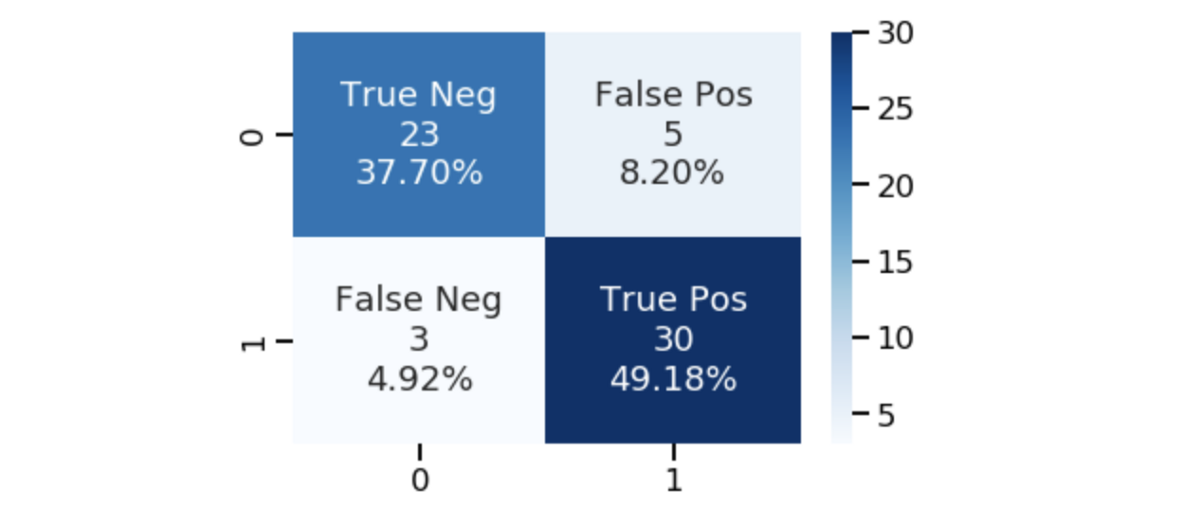

In [48]:
#importing libraries for evaluation
from sklearn.metrics import hamming_loss,accuracy_score,log_loss,f1_score
from sklearn.metrics import coverage_error,precision_score,label_ranking_average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import cross_val_score

# Building model based on Heading of review

### 1) Power Transformation

### 1.1 Binary relevance with GuassianNb as base classifier

In [49]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,x,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  22.377622377622377
Cross validation score= 17.74993038150933


log loss= 11.053394050528903
hamming loss= 0.3832167832167832


f1 score= 0.41201716738197425
average precision score= 0.29721362229102166
AUC ROC score= 0.5973940707293482


label ranking average precision score= 0.4294871794871801
coverage area= 3.4825174825174825




In [50]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[ 59,  48],
        [  7,  29]],

       [[102,  29],
        [  6,   6]],

       [[ 86,  43],
        [  8,   6]],

       [[ 59,  57],
        [ 12,  15]],

       [[ 39,  50],
        [ 14,  40]]])

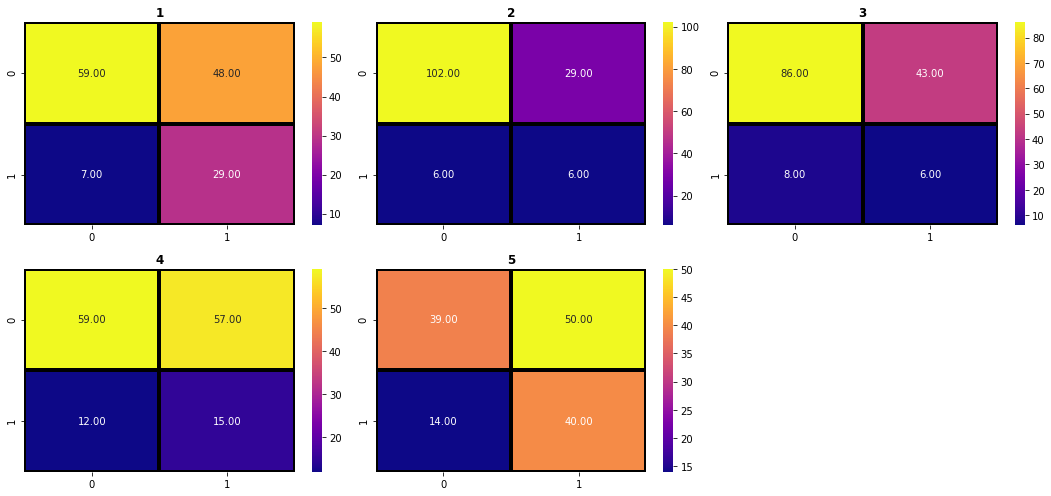

In [51]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 1.2 Label powerset

In [52]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,x,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  34.26573426573427
Cross validation score= 30.75837742504409


log loss= 22.703811056794436
hamming loss= 0.2629370629370629


AUC ROC score= 0.5963249123678086
f1 score= 0.34265734265734266
average precision score= 0.34265734265734266


coverage area= 3.629370629370629
label ranking average precision score= 0.474125874125875


In [53]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[ 95,  12],
        [ 19,  17]],

       [[101,  30],
        [  6,   6]],

       [[111,  18],
        [ 11,   3]],

       [[ 91,  25],
        [ 19,   8]],

       [[ 80,   9],
        [ 39,  15]]])

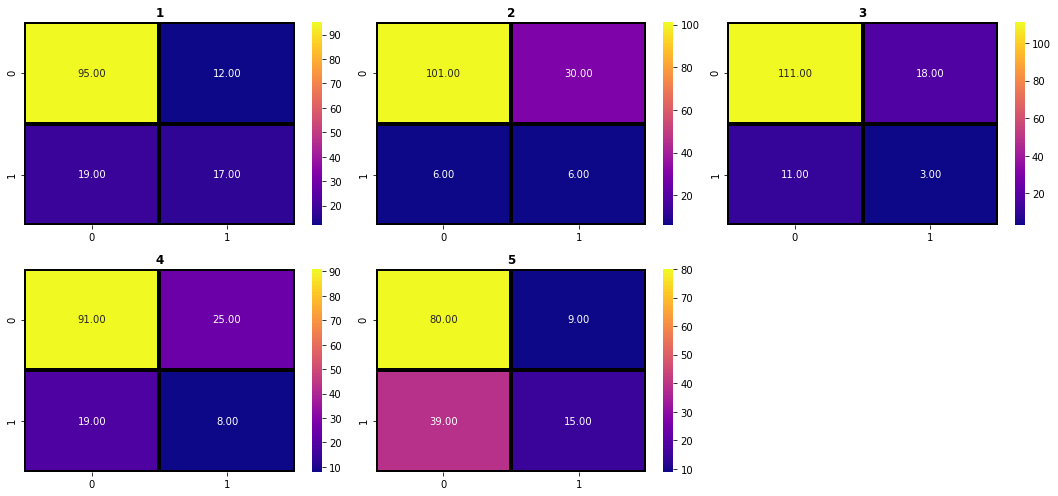

In [54]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [55]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,x,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  25.174825174825177
Cross validation score= 24.78325443237724


log loss= 8.573067748739163
hamming loss= 0.1944055944055944


AUC ROC score= 0.5388310870408659
f1 score= 0.3412322274881517
average precision score= 0.5294117647058824


coverage area= 3.993006993006993
label ranking average precision score= 0.40139860139860206


In [56]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[106,   1],
        [ 28,   8]],

       [[131,   0],
        [ 12,   0]],

       [[129,   0],
        [ 14,   0]],

       [[114,   2],
        [ 27,   0]],

       [[ 60,  29],
        [ 26,  28]]])

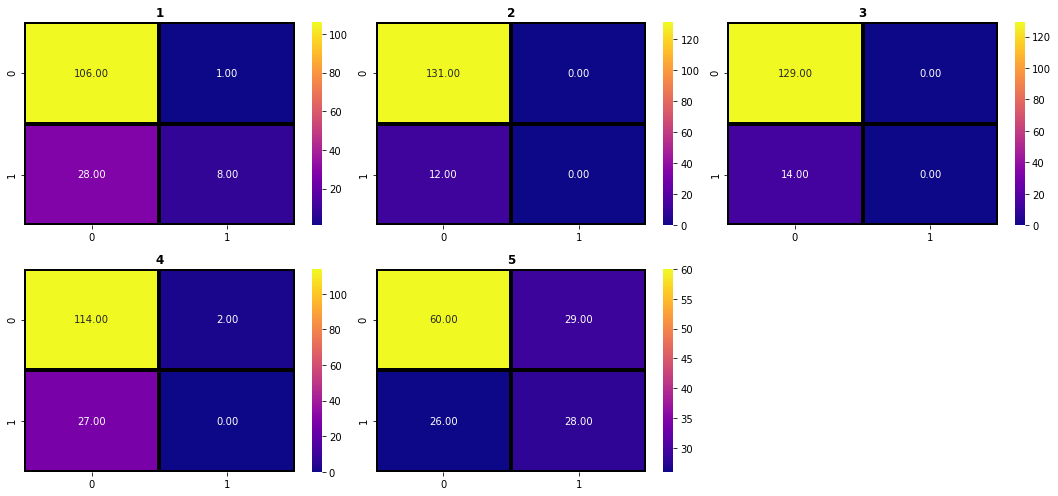

In [57]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 3) Adapted Algorithm
Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

For example, multi-label version of kNN is represented by MLkNN. So, let us quickly implement this on our randomly generated data set.

In [58]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,x,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  34.96503496503497
Cross validation score= 29.361366378910237


log loss= 15.654756273235616
hamming loss= 0.22657342657342658


AUC ROC score= 0.60710911386317
f1 score= 0.47741935483870973
average precision score= 0.4431137724550898


label ranking average precision score= 0.5300699300699308
coverage area= 3.097902097902098


In [59]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[ 89,  18],
        [ 13,  23]],

       [[122,   9],
        [ 10,   2]],

       [[127,   2],
        [ 14,   0]],

       [[ 82,  34],
        [ 14,  13]],

       [[ 59,  30],
        [ 18,  36]]])

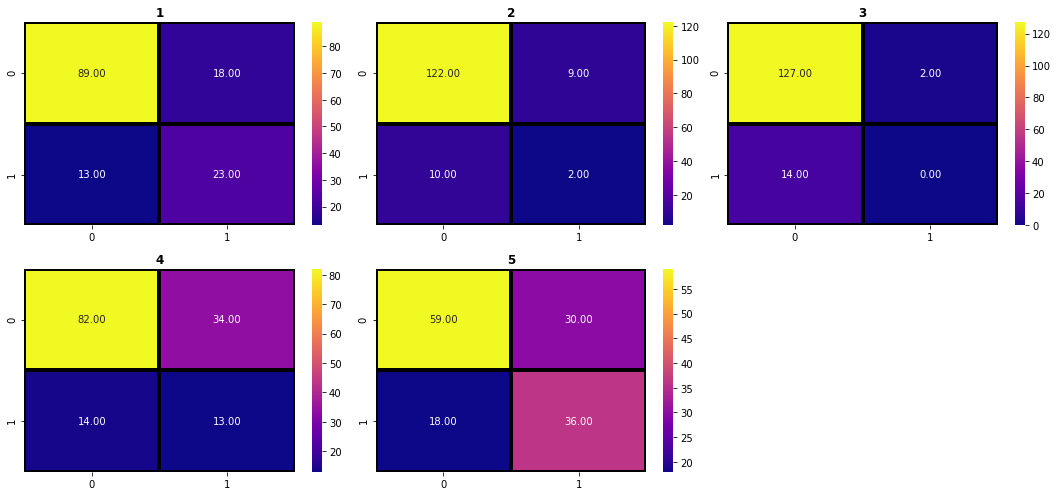

In [60]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### Comparing all the models performance

In [61]:
#creating a comparision table for better understanding

df_comparison_heading=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_heading.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Adapted algorithm,34.965035,29.361366,0.226573,15.654756,0.607109,0.477419,0.443114,3.097902,0.530070
1,Label powerset,34.265734,30.758377,0.262937,22.703811,0.596325,0.342657,0.342657,3.629371,0.474126
2,Classifier chain,25.174825,24.783254,0.194406,8.573068,0.538831,0.341232,0.529412,3.993007,0.401399
3,Binary Relevance,22.377622,17.749930,0.383217,11.053394,0.597394,0.412017,0.297214,3.482517,0.429487


#### Conclusion:
* The hamming loss for Classifier Chain is the least among all.
* The log loss is least for Classifier Chain.
* The AUC ROC Score for Adapted Algorithm is maximum which is 0.60
* The accuracy score of Adapted Algorithm is best out of 4 selected models.

# Building model based on actual reviews and evaluation of its performance

In [62]:
# Separation of Labels and Features
z = df['Review']
y = df[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [63]:
z.shape

(5580,)

In [64]:
y.shape

(5580, 5)

In [65]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
z = tf.fit_transform(z)

In [66]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.25, random_state=123)

# 1) Power Transformation
# 1.1 Binary relevance with GuassianNb as base classifier

In [67]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,z,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  10.25089605734767
Cross validation score= 9.677419354838708


log loss= 6.145244612701795
hamming loss= 0.5331899641577061


f1 score= 0.3773648083040348
average precision score= 0.24617737003058104
AUC ROC score= 0.5492211455172427


label ranking average precision score= 0.3258064516128982
coverage area= 4.036559139784946




In [68]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[359, 660],
        [ 53, 323]],

       [[649, 657],
        [ 39,  50]],

       [[541, 732],
        [ 48,  74]],

       [[380, 776],
        [ 64, 175]],

       [[200, 626],
        [ 64, 505]]])

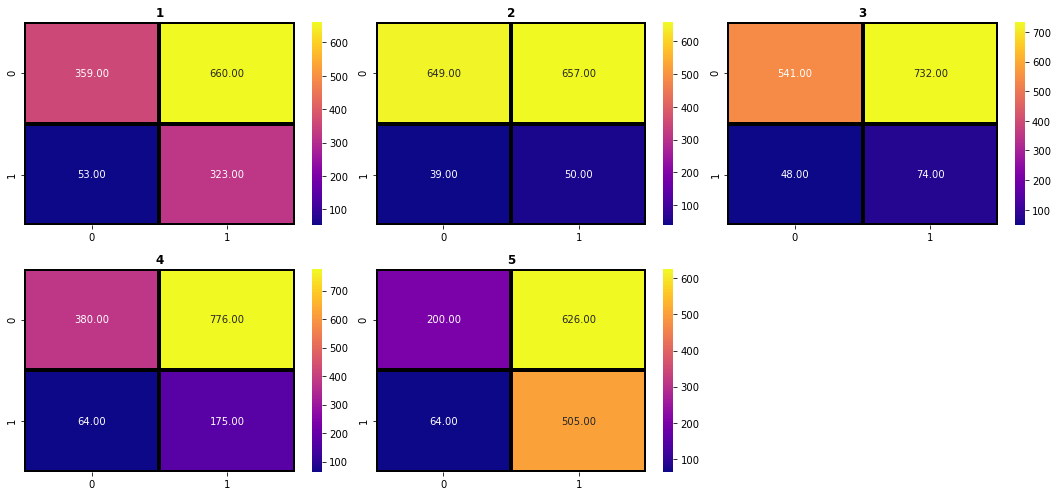

In [69]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 1.2 Label powerset

In [70]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,z,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  21.863799283154123
Cross validation score= 20.179211469534053


log loss= 26.98728764907
hamming loss= 0.3125448028673835


AUC ROC score= 0.5457775876942188
f1 score= 0.21863799283154123
average precision score= 0.21863799283154123


coverage area= 4.125448028673835
label ranking average precision score= 0.3749103942652276


In [71]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[ 941,   78],
        [ 292,   84]],

       [[ 687,  619],
        [  40,   49]],

       [[1073,  200],
        [  95,   27]],

       [[1041,  115],
        [ 194,   45]],

       [[ 748,   78],
        [ 469,  100]]])

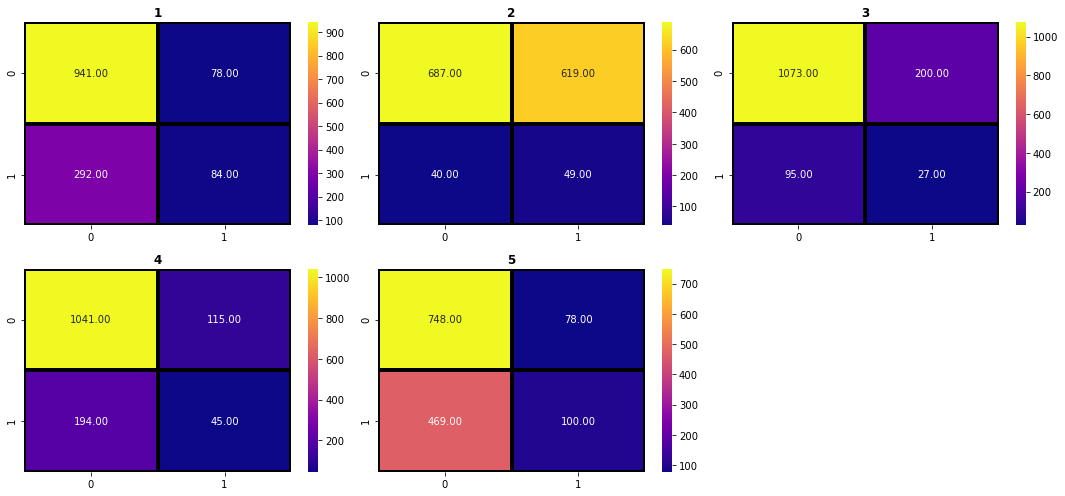

In [72]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [73]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,z,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  45.16129032258064
Cross validation score= 42.97491039426524


log loss= 7.9169626313907635
hamming loss= 0.15240143369175627


AUC ROC score= 0.5883752990910887
f1 score= 0.5424020662935858
average precision score= 0.6788793103448276


coverage area= 3.193548387096774
label ranking average precision score= 0.5612903225806516


In [74]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[ 986,   33],
        [ 241,  135]],

       [[1306,    0],
        [  89,    0]],

       [[1273,    0],
        [ 122,    0]],

       [[1154,    2],
        [ 236,    3]],

       [[ 563,  263],
        [  77,  492]]])

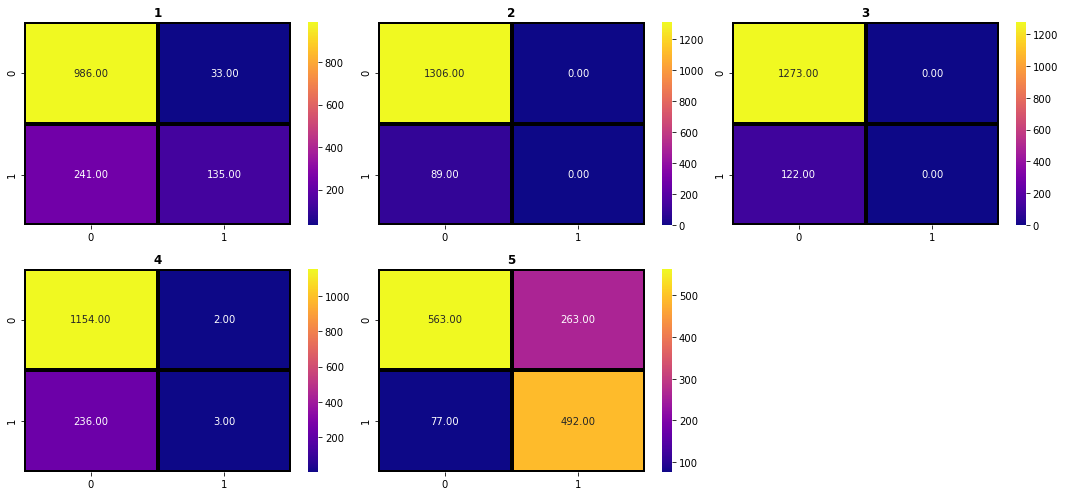

In [75]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 3) Adapted Algorithm

In [76]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,z,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  48.17204301075269
Cross validation score= 44.6415770609319


log loss= 11.810584949850517
hamming loss= 0.1703225806451613


AUC ROC score= 0.6091469641401446
f1 score= 0.5308056872037915
average precision score= 0.5910290237467019


label ranking average precision score= 0.5853763440860277
coverage area= 3.0731182795698926


In [77]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[ 899,  120],
        [ 131,  245]],

       [[1290,   16],
        [  86,    3]],

       [[1235,   38],
        [ 112,   10]],

       [[1080,   76],
        [ 205,   34]],

       [[ 611,  215],
        [ 189,  380]]])

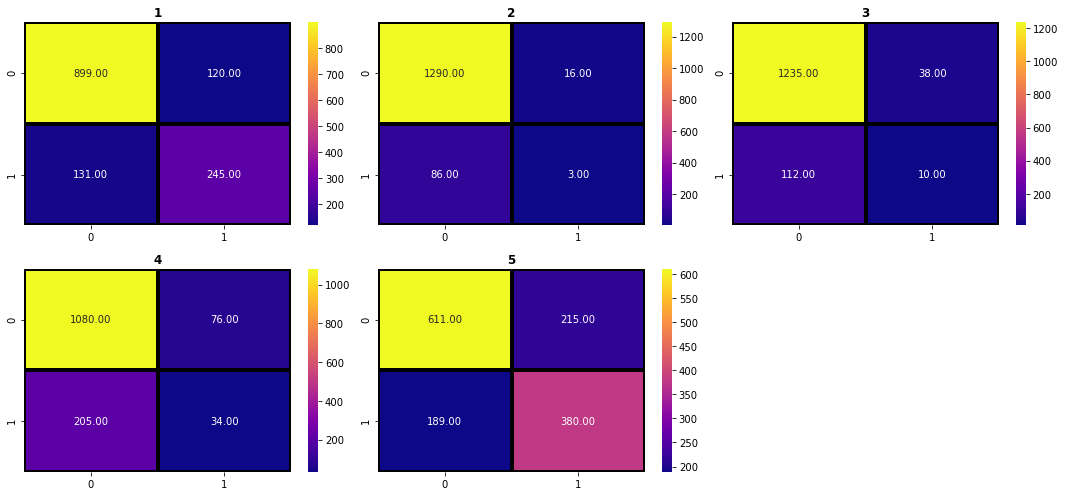

In [78]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()
  

# Comparing all the models performance

In [79]:
#creating a comparision table for better understanding

df_comparison_review=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_review.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Adapted algorithm,48.172043,44.641577,0.170323,11.810585,0.609147,0.530806,0.591029,3.073118,0.585376
1,Classifier chain,45.161290,42.974910,0.152401,7.916963,0.588375,0.542402,0.678879,3.193548,0.561290
2,Label powerset,21.863799,20.179211,0.312545,26.987288,0.545778,0.218638,0.218638,4.125448,0.374910
3,Binary Relevance,10.250896,9.677419,0.533190,6.145245,0.549221,0.377365,0.246177,4.036559,0.325806


#### Conclusion:
* The hamming loss for Classifier Chain is the least among all.
* The log loss is least for Binary Relevance.
* The AUC ROC Score for Adapted Algorithm is maximum which is 0.56
* The accuracy score of Adapted Algorithm is best out of 4 selected models.

# Comparison of Model performance for heading and review

In [80]:
df_comparison_heading['Data']='Heading'
df_comparison_review['Data']='Review'
df_merged=pd.concat([df_comparison_heading,df_comparison_review])
df_merged

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking,Data
0,Binary Relevance,22.377622,17.749930,0.383217,11.053394,0.597394,0.412017,0.297214,3.482517,0.429487,Heading
1,Classifier chain,25.174825,24.783254,0.194406,8.573068,0.538831,0.341232,0.529412,3.993007,0.401399,Heading
2,Label powerset,34.265734,30.758377,0.262937,22.703811,0.596325,0.342657,0.342657,3.629371,0.474126,Heading
3,Adapted algorithm,34.965035,29.361366,0.226573,15.654756,0.607109,0.477419,0.443114,3.097902,0.530070,Heading
0,Binary Relevance,10.250896,9.677419,0.533190,6.145245,0.549221,0.377365,0.246177,4.036559,0.325806,Review
1,Classifier chain,45.161290,42.974910,0.152401,7.916963,0.588375,0.542402,0.678879,3.193548,0.561290,Review
2,Label powerset,21.863799,20.179211,0.312545,26.987288,0.545778,0.218638,0.218638,4.125448,0.374910,Review
3,Adapted algorithm,48.172043,44.641577,0.170323,11.810585,0.609147,0.530806,0.591029,3.073118,0.585376,Review


#### Conclusion:
* The hamming loss by Classifier Chain is the least both for heading of reviews and reviews.
* The log loss is least by Clasifier Chain for heading of reviews and Binary Relevance for reviews. 
* The AUC ROC score by Adapted Algorithm is the best both for heading of reviews and reviews.
* The Accuracy score by Adapted Algorithm is the best both for heading of reviews and reviews.

# Saving Best Model

# saving classifier chain as our best model
import pickle
filename="Review_Classification_Laptop_Model.pkl"
pickle.dump(classifier3,open(filename,'wb'))